# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## Max Marks without Bonus attempted: 80 points
## Max Marks with Bonus: 100 points
- ### Bonus: 20 points

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data [Optional] --> Carries Bonus Marks
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

## 1. Download the dataset [1 point]

#already downloaded 

# important libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

## 2. Load the dataset [1 point]

In [6]:
df = pd.read_csv("financial_news_headlines_sentiment.csv", encoding="ISO-8859-1")


## 3. Explore the dataset [10 points]

In [9]:
print(df.head())
print(df.info())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column

# The first column represents sentiment labels but is incorrectly named "neutral".The second column contains the news headlines but has a long, incorrect name.

In [12]:
# Rename columns to 'sentiment' and 'headline'
df.columns = ['sentiment', 'headline']


In [14]:
# exploring it again to see changes 
print(df.head())

  sentiment                                           headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [16]:
print("\nValue Counts of Sentiment Labels:\n", df['sentiment'].value_counts())


Value Counts of Sentiment Labels:
 sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64


In [18]:
df.shape

(4845, 2)

## 4. Clean the data [5 points]

In [21]:
 # Remove nulls
df.dropna(subset=['headline', 'sentiment'], inplace=True)
# Convert to string
df['headline'] = df['headline'].astype(str)  
# Remove special characters
df['headline'] = df['headline'].str.replace("[^a-zA-Z ]", "", regex=True).str.lower()  


In [23]:
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])  # Encode labels (0,1,2)


In [25]:
df.head()

,sentiment,headline
0,1,technopolis plans to develop in stages an area...
1,0,the international electronic industry company ...
2,2,with the new production plant the company woul...
3,2,according to the company s updated strategy fo...
4,2,financing of aspocomp s growth aspocomp is agg...


## 5. SMOTE (Imbalanced dataset) [OPTIONAL] BONUS [20 points]
Hint: Use **imblearn** library

In [28]:
# Extract the target labels and features
X = df['headline']  # Features (headlines)
y = df['sentiment']  # Target labels (sentiment)

# Now we vectorize the cleaned text
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)  # Vectorizing the cleaned text 

# Convert sparse matrix to dense array for SMOTE
X_dense = X_vectorized.toarray()

# Check class imbalance before applying SMOTE
print("\nClass distribution before SMOTE:\n", pd.Series(y).value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:\n", pd.Series(y_resampled).value_counts())




Class distribution before SMOTE:
 sentiment
1    2878
2    1363
0     604
Name: count, dtype: int64

Class distribution after SMOTE:
 sentiment
1    2878
0    2878
2    2878
Name: count, dtype: int64


## 6. BoW model [15 points]

In [31]:
# BoW Model (Bag of Words)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['headline'])  # BoW representation of the headlines


## 7. Tf-idf model [15 points]

In [34]:
# TF-IDF Model
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['headline'])  # TF-IDF representation of the headlines


## 8. Split train test data [3 points]

In [37]:
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)


## 9. Classification Algorithm [10 points]
- Train
- Predict

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model
y_pred_rf = rf_model.predict(X_test)  # Predict on the test set

# Random Forest classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.42      0.57       115
           1       0.71      0.98      0.82       567
           2       0.84      0.40      0.55       287

    accuracy                           0.74       969
   macro avg       0.82      0.60      0.65       969
weighted avg       0.77      0.74      0.71       969



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [42]:
from sklearn.naive_bayes import MultinomialNB

# (Naïve Bayes)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)  # Fit the model
y_pred_nb = nb_model.predict(X_test)  # Predict on the test set

# Naïve Bayes classification report
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.08       115
           1       0.66      0.98      0.79       567
           2       0.63      0.28      0.39       287

    accuracy                           0.66       969
   macro avg       0.76      0.43      0.42       969
weighted avg       0.69      0.66      0.59       969



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

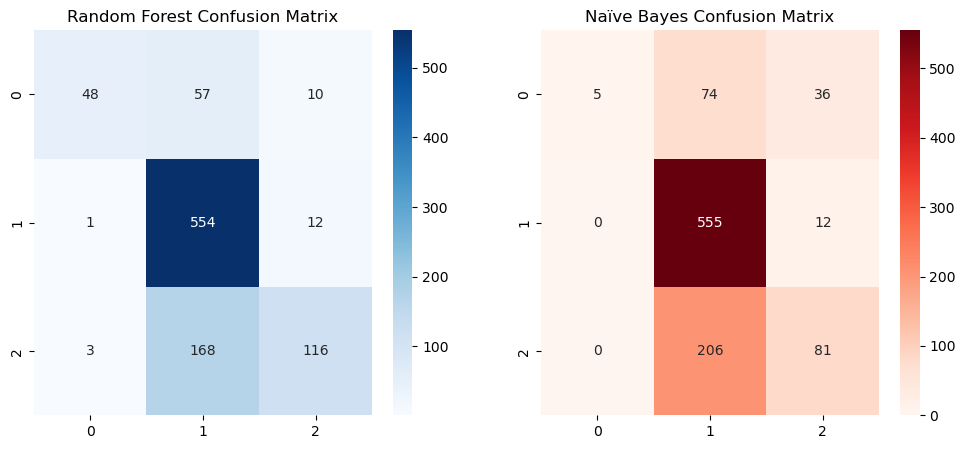

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", ax=ax[0], cmap='Blues')
ax[0].set_title("Random Forest Confusion Matrix")

# Naïve Bayes Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", ax=ax[1], cmap='Reds')
ax[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()


# For this problem, Random Forest is a better choice as it handles the classification of all classes more effectively, especially considering the class imbalance and performance across multiple categories